In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


**Installation**

In [2]:
!pip install datasets
!pip install nltk

**Import Libraries**

In [3]:
##Data handling
import pandas as pd
import numpy  as np
import os

##Visualizations

import matplotlib.pyplot as plt
import plotly.express as px
import seaborn as sns
from matplotlib import axes
import plotly.express as px
from plotly.offline import iplot, init_notebook_mode

##NLP

import nltk
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

from nltk import FreqDist
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from nltk.corpus import wordnet
from nltk.corpus import stopwords
from collections import Counter
from collections import defaultdict

import string
nltk.download('punkt')
nltk.download('wordnet')
nltk.download("words")
nltk.download('averaged_perceptron_tagger')
from string import punctuation
import re,string, unicodedata
from wordcloud import WordCloud, STOPWORDS

#others
import warnings
warnings.filterwarnings("ignore")


pd.set_option("display.max_rows", None)
pd.set_option("display.max_columns", None)


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [4]:
# Disabe W&B
os.environ["WANDB_DISABLED"] = "true"

**Loading the dataset**

In [5]:
train_df= pd.read_csv("/content/drive/MyDrive/NLP_Capstone/Train.csv")
test_df= pd.read_csv("/content/drive/MyDrive/NLP_Capstone/Test.csv")

In [6]:
#Showing the first 10 rows in the  train data
train_df.head(10)

,review_file,content,sentiment
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive
1,9693_8.txt,I was very surprised with this film. I was tou...,positive
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive
5,5454_1.txt,"Wow, this film was just bloody horrid. SO bad ...",negative
6,8786_1.txt,Absolutely one of the worst movies of the year...,negative
7,4342_1.txt,I have to say this is one of the worst films I...,negative
8,10203_2.txt,"well, the writing was very sloppy, the directi...",negative
9,9552_1.txt,Just plain good old stupid. <br /><br />I mean...,negative


In [7]:
#Showing the last 10 rows in the test data
test_df.head(10)

,review_file,content
0,0_10.txt,I went and saw this movie last night after bei...
1,0_2.txt,Once again Mr. Costner has dragged out a movie...
2,10000_4.txt,This is an example of why the majority of acti...
3,10000_7.txt,Actor turned director Bill Paxton follows up h...
4,10001_1.txt,"First of all I hate those moronic rappers, who..."
5,10001_9.txt,As a recreational golfer with some knowledge o...
6,10002_3.txt,Not even the Beatles could write songs everyon...
7,10002_8.txt,"I saw this film in a sneak preview, and it is ..."
8,10003_3.txt,Brass pictures (movies is not a fitting word f...
9,10003_8.txt,Bill Paxton has taken the true story of the 19...


The CRISP-DM Framework will be used. The framework consists of the following steps:

*   Business Understanding
*   Data Understanding
*   Data Preparation
*   Modelling
*   Evaluation
*   Deployment

**DATA UNDERSTANDING**

The folllowing will be delved into to get insights to the datasets being used

*   check for data info
*   check for shape of data
*   Check Statistical distribution
*   Check for missing values
*   Check for duplicates
*   Check for unique values
*   create visuals



**DATA INFO**

In [8]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
dtypes: object(3)
memory usage: 586.1+ KB


In [9]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
dtypes: object(2)
memory usage: 390.8+ KB


**Statistical Distribution of Numerical Features in the Data**

In [10]:
train_df.describe().T

,count,unique,top,freq
review_file,25000,25000,3471_8.txt,1
content,25000,24904,How has this piece of crap stayed on TV this l...,3
sentiment,25000,2,positive,12500


In [11]:
test_df.describe().T

,count,unique,top,freq
review_file,25000,25000,0_10.txt,1
content,25000,24801,Loved today's show!!! It was a variety and not...,5


**DATA SHAPE**

In [12]:
train_df. shape

(25000, 3)

In [13]:
test_df.shape

(25000, 2)

**Remark**

There are 25000 rows and 3 columns in the train data whiles the test data has 25000 rows and 2 columns

**MISSING VALUES**

In [14]:
train_df.isna().sum()

review_file    0
content        0
sentiment      0
dtype: int64

In [15]:
test_df.isna().sum()

review_file    0
content        0
dtype: int64

**Remark**

There are no missing values in both the train and test data

**UNIQUE VALUES**

In [16]:
train_df.sentiment.unique()

array(['positive', 'negative'], dtype=object)

The train data consists of positive and negative sentiments

In [17]:
train_df['sentiment'].value_counts()

positive    12500
negative    12500
Name: sentiment, dtype: int64

In [18]:
##create copies of the datasets

train_data= train_df.copy()
test_data= test_df.copy()

In [19]:
# Assign values in 'sentiment' to 1 for 'positive' and 0 for 'negative' to create labels for sentiments
train_data['label'] = train_data['sentiment'].map({'positive': 1, 'negative': -1})



In [20]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25000 entries, 0 to 24999
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   review_file  25000 non-null  object
 1   content      25000 non-null  object
 2   sentiment    25000 non-null  object
 3   label        25000 non-null  int64 
dtypes: int64(1), object(3)
memory usage: 781.4+ KB


**DUPLICATES**

In [21]:
# Check for duplicates in the 'content' column of the train data
Train_duplicate_rows = train_data['content'].duplicated().sum()
print('There are', Train_duplicate_rows, 'duplicated rows in the train data')

There are 96 duplicated rows in the train data


In [22]:
# Check for duplicates in the 'content' column of the test data
Test_duplicate_rows = test_data['content'].duplicated().sum()
print('There are', Test_duplicate_rows, 'duplicated rows in the test data')

There are 199 duplicated rows in the test data


 **VISUALIZATIONS**

Distrubution of Sentiments

In [23]:
plot_1=px.histogram(data_frame= train_data, x= "sentiment",title= "Distribution of Sentiments")
plot_1.show()

In [24]:
# visualizing the percentage unique values of the target  feature(sentiment).
fig_2 = px.pie(train_data, names='sentiment', title='Plot of the percentages of Positive and Negative Sentiments')
iplot(fig_2)

**Remark**

There are equal numbers of both positive and negative sentiments

**The Count of Words in a Content**

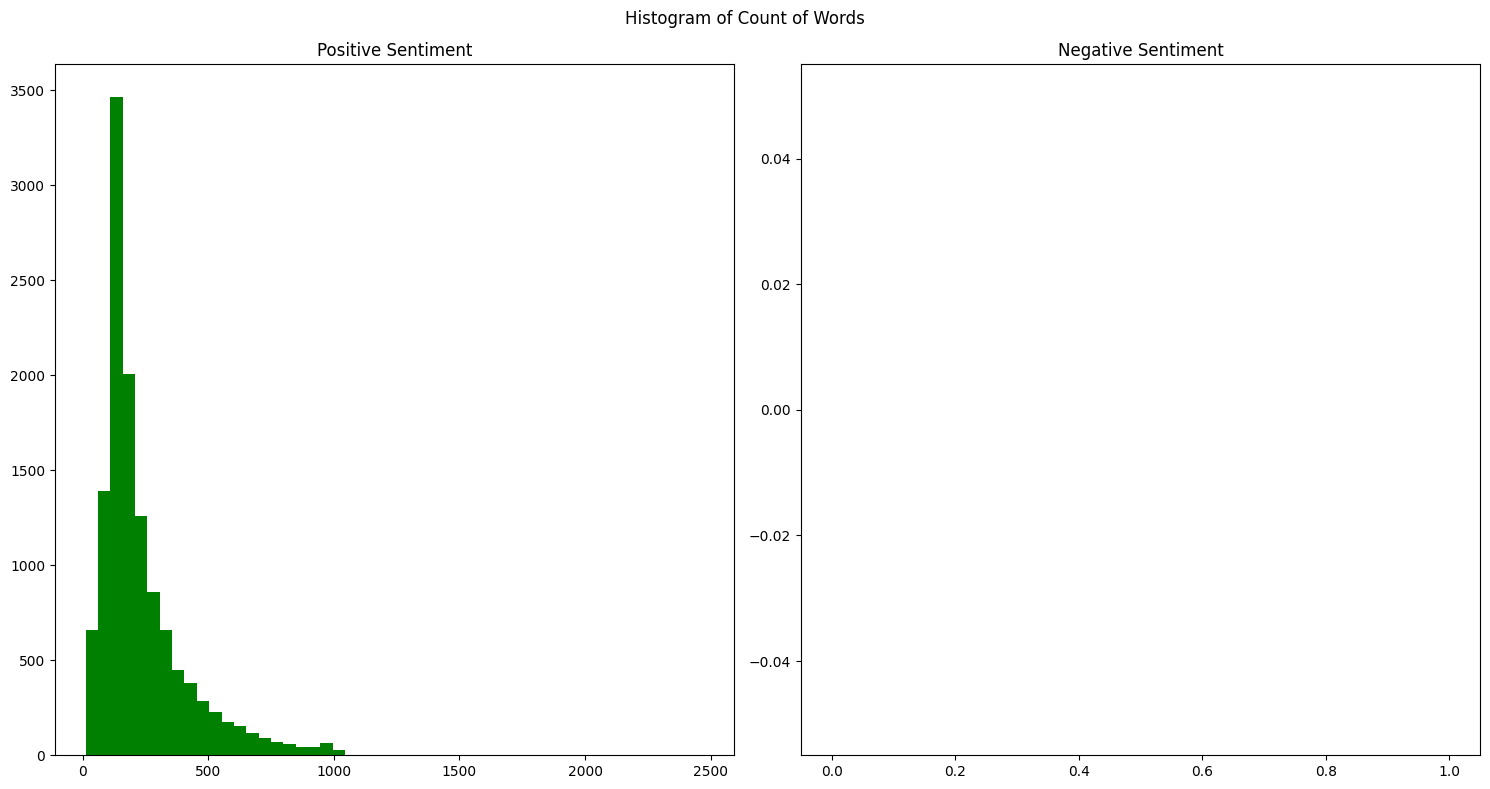

In [25]:
# Make a plot using a row and 2 columns of subplots of negative and positive sentiments
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 8))

#Create a histogram of the count of words  with 'Positive Sentiment' (label == 1)
ax1.hist(train_data[train_data['label'] == 1]['content'].str.split().map(lambda x: len(x)), bins=50, color='g')
ax1.set_title('Positive Sentiment')

# Create  a histogram of the count of words  with 'Negative Sentiment' (label == 0)
ax2.hist(train_data[train_data['label'] == 0]['content'].str.split().map(lambda x: len(x)), bins=50, color='y')
ax2.set_title('Negative Sentiment')

# Set a super title for the whole figure
f.suptitle('Histogram of Count of Words')

# Fit the layout of subplots to avoid overlay
plt.tight_layout()

# Show figure
plt.show()

**Count of characters in a content**

In [26]:
# Calculate the count of characters in the 'content' column of the train data
train_data['characters_in_content'] = train_data['content'].str.len()


In [27]:
# show first 10 rows
train_data.head(10)

,review_file,content,sentiment,label,characters_in_content
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1,991
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1,655
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,-1,870
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1,1617
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1,515
5,5454_1.txt,"Wow, this film was just bloody horrid. SO bad ...",negative,-1,1161
6,8786_1.txt,Absolutely one of the worst movies of the year...,negative,-1,2335
7,4342_1.txt,I have to say this is one of the worst films I...,negative,-1,709
8,10203_2.txt,"well, the writing was very sloppy, the directi...",negative,-1,1412
9,9552_1.txt,Just plain good old stupid. <br /><br />I mean...,negative,-1,618


In [28]:
# plot a histogram
fig_4 = px.histogram(data_frame=train_data, x="characters_in_content", title="Count of Characters in content")

# show histogram
fig_4.show()

**Creating a Graph for Common Words Used**

In [29]:
##Setting an instance for  Wordcloud library

wc= WordCloud(background_color= "white",

              height= 600,

              width= 400

              )

In [30]:
# Select the "content" column from the traindata
train_content = train_data["content"]

In [31]:
## Creating a single string from all the text in the several rows

text_train= " ".join(train_content)

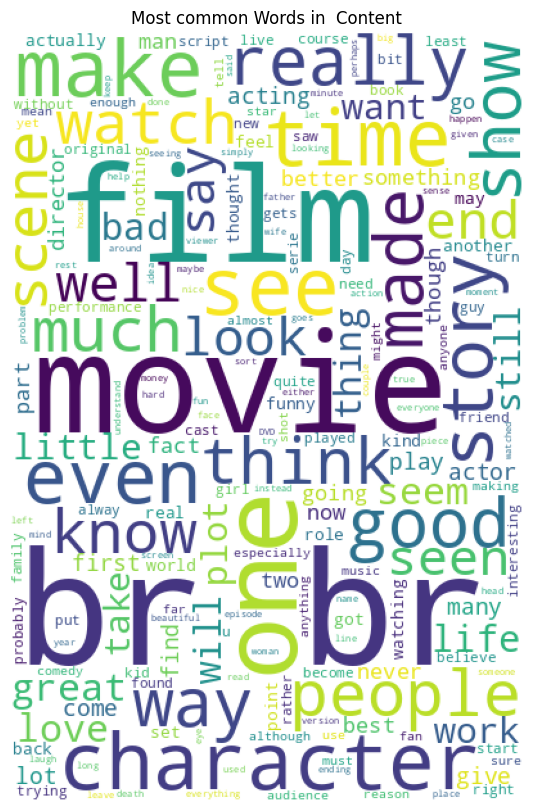

In [32]:
wc_train= wc.generate(text_train)
plt.figure(figsize= (15,10))
plt.title("Most common Words in  Content")
plt.axis("off")
plt.imshow(wc_train)

**Remarks**

The most common words used are

*   movie
*   film
*   br
*   one
*   Character
*   Story
*   made
*   see, etc







In [33]:
# minimum count of words in content
train_data['content'].str.split().map(lambda x: len(x)).min()

10

In [34]:
# maximum count of words in content
train_data['content'].str.split().map(lambda x: len(x)).max()

2470

**DATA PREPARATION**

Here, the issues encoutered during the data exploration will be addressed. These include duplicated rows. NLP preprocessing will also be done.

**Duplicated Rows**

 The duplicated rows in the train and test data with regards to the 'content' column will be dropped, only the first occurrence of each of the duplicated will be maintained.


In [35]:
train_data = train_data.drop_duplicates(subset='content', keep='first')


In [36]:
# Reset the index of the DataFrame
train_data = train_data.reset_index(drop=True)

# choose and keep only the 'review_file', 'content', 'sentiment', and 'label' columns
train_data = train_data[['review_file', 'content', 'sentiment', 'label']]

# show first 5 rows
train_data.head()

,review_file,content,sentiment,label
0,3471_8.txt,Recently shown on cable tv the movie opens wit...,positive,1
1,9693_8.txt,I was very surprised with this film. I was tou...,positive,1
2,10801_1.txt,"Now, I'm one to watch movies that got poor rev...",negative,-1
3,9592_8.txt,"This film came out 12 years years ago, and was...",positive,1
4,8514_7.txt,"When an orphanage manager goes on vacation, hi...",positive,1


In [37]:

test_data = test_data.drop_duplicates(subset='content', keep='first')


In [38]:
# Reset the index of the DataFrame
test_data = test_data.reset_index(drop=True)

# choose and keep only the 'review_file' and 'content' columns
test_data = test_data[['review_file', 'content']]

# Display the last five rows
test_data.tail()

,review_file,content
24796,999_8.txt,"From the start of ""The Edge Of Love"", the view..."
24797,99_10.txt,"This movie, with all its complexity and subtle..."
24798,99_3.txt,Four things intrigued me as to this film - fir...
24799,9_4.txt,David Bryce's comments nearby are exceptionall...
24800,9_7.txt,I've seen this story before but my kids haven'...


Confirm there are no duplicates in both the train and test data

In [39]:
Train_duplicate_rows = train_data['content'].duplicated().sum()

print('There are ',Train_duplicate_rows,' duplicated rows in the train data')


There are  0  duplicated rows in the train data


In [40]:
Test_duplicate_rows = test_data['content'].duplicated().sum()
print('There are ',Test_duplicate_rows,' duplicated rows in the test data')

There are  0  duplicated rows in the test data


**NLP Preprocessing**

 **Changing Everything to Lowercase**

In [41]:
# convert all the components in the train data to lowercase
train_data = train_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)

# convert all the components in the test data to lowercase
test_data = test_data.applymap(lambda x: x.lower() if isinstance(x, str) else x)


In [42]:
# Transform the 'content' column to a single string in the train data
train_data['content'] = train_data['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

# # Transform the 'content' column to a single string in the test data
test_data['content'] = test_data['content'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)


In [43]:
train_data.iloc[5:15]

,review_file,content,sentiment,label
5,5454_1.txt,"wow, this film was just bloody horrid. so bad ...",negative,-1
6,8786_1.txt,absolutely one of the worst movies of the year...,negative,-1
7,4342_1.txt,i have to say this is one of the worst films i...,negative,-1
8,10203_2.txt,"well, the writing was very sloppy, the directi...",negative,-1
9,9552_1.txt,just plain good old stupid. <br /><br />i mean...,negative,-1
10,11299_4.txt,the mummy's tomb starts with a review of the e...,negative,-1
11,2222_10.txt,i loved this movie it was one of the years bes...,positive,1
12,6344_2.txt,"well i'm blowed, a woody allen film that i wal...",negative,-1
13,10071_9.txt,when tradition dictates that an artist must pa...,positive,1
14,11990_10.txt,"in the year 1990, the world of disney tv carto...",positive,1


In [44]:
test_data.iloc[5:15]

,review_file,content
5,10001_9.txt,as a recreational golfer with some knowledge o...
6,10002_3.txt,not even the beatles could write songs everyon...
7,10002_8.txt,"i saw this film in a sneak preview, and it is ..."
8,10003_3.txt,brass pictures (movies is not a fitting word f...
9,10003_8.txt,bill paxton has taken the true story of the 19...
10,10004_2.txt,"a funny thing happened to me while watching ""m..."
11,10004_9.txt,"i saw this film on september 1st, 2005 in indi..."
12,10005_2.txt,this german horror film has to be one of the w...
13,10005_8.txt,"maybe i'm reading into this too much, but i wo..."
14,10006_2.txt,"being a long-time fan of japanese film, i expe..."


**Eliminating Punctuations**

In [45]:
##removing hashtags:

def punctuation_remover(text):
  ##removing has tags
  text= re.sub(r'#\w+', '', text)
  ##removing punctuations
  text= re.sub("[^\w\s]", repl= "", string=text)
  return text

In [46]:
##creating a new column for content without punctuation
train_data["Transformed_content"]= train_data["content"].apply(punctuation_remover)

test_data["Transformed_content"]= test_data["content"].apply(punctuation_remover)

In [47]:
train_data["Transformed_content"].head()

0    recently shown on cable tv the movie opens wit...
1    i was very surprised with this film i was touc...
2    now im one to watch movies that got poor revie...
3    this film came out 12 years years ago and was ...
4    when an orphanage manager goes on vacation his...
Name: Transformed_content, dtype: object

In [48]:
test_data["Transformed_content"].tail()

24796    from the start of the edge of love the viewer ...
24797    this movie with all its complexity and subtlet...
24798    four things intrigued me as to this film  firs...
24799    david bryces comments nearby are exceptionally...
24800    ive seen this story before but my kids havent ...
Name: Transformed_content, dtype: object

**Eliminating url**

In [49]:
# Create a function to substitute URLs
def sub_url(df, column):
    # Substitute URLs in the 'content' column with 'urlweb' using regular expression
    url_df = train_data['Transformed_content'].str.replace(r'http.?://[^\s]+[\s]?', 'urlweb ')
    return url_df

# Use the 'sub_url' function in the 'Transformed_content' column of the train data
train_data['Transformed_content'] = sub_url(train_data, 'Transformed_content')

# Use the 'sub_url' function in the 'Transformed_content' column of the test data
test_data['Transformed_content'] = sub_url(test_data, 'Transformed_content')


**Removing Special Characters**

In [50]:
def remove_special_characters(input_string):
    pattern = r'[^a-zA-Z0-9\s]'
    cleaned_string = re.sub(pattern, '', input_string)
    return cleaned_string

In [51]:
#Apply 'remove_special_characters to both train and test data
train_data["Transformed_content"]= train_data["Transformed_content"].apply(remove_special_characters)
test_data["Transformed_content"]= test_data["Transformed_content"].apply(remove_special_characters)

**Eliminate Numbers**

In [52]:
# create a function to eliminate numbers
def eliminate_numbers(df, column):
    #  eliminate numbers from the 'content' column using  a lambda function and regular expression
    numbers_df = df[column].apply(lambda x: re.sub(r'\d', '', x))
    return numbers_df

# Use the 'eliminate_numbers' function in the 'Transformed_content' column of the train data
train_data['Transformed_content'] = eliminate_numbers(train_data, 'Transformed_content')

# Use the 'eliminate_numbers' function in the 'Transformed_content' column of the test data
test_data['Transformed_content'] =eliminate_numbers(test_data, 'Transformed_content')


In [53]:
train_data['Transformed_content'].iloc[15:20]

15    lawrence olivier and merle oberon did two movi...
16    this movie is funny and suitable for any age i...
17    i viewed this movie in dvd format my copy may ...
18    as a kid i loved this game i played it a zilli...
19    i totally agree that nothing is a fantastic fi...
Name: Transformed_content, dtype: object

In [54]:
test_data['Transformed_content'].iloc[15:20]

15    lawrence olivier and merle oberon did two movi...
16    this movie is funny and suitable for any age i...
17    i viewed this movie in dvd format my copy may ...
18    as a kid i loved this game i played it a zilli...
19    i totally agree that nothing is a fantastic fi...
Name: Transformed_content, dtype: object

In [55]:
#Drop columns not needed for analysis
train_data.drop(['review_file', 'sentiment'], axis=1, inplace=True)

**FEATURE ENGINEERING**

The most relevant columns will be maintained from the train and test dataset

In [56]:
Transformed_train= train_data[["content", "label","Transformed_content"]]

In [57]:
Transformed_train.iloc[25:30]

,content,label,Transformed_content
25,wow! why would anybody make a sequel to an alr...,-1,wow why would anybody make a sequel to an alre...
26,oh yeah! jenna jameson did it again! yeah baby...,1,oh yeah jenna jameson did it again yeah baby t...
27,"its not braveheart( thankfully),but it is fine...",1,its not braveheart thankfullybut it is fine en...
28,i saw this film on tv many years ago and i saw...,1,i saw this film on tv many years ago and i saw...
29,berlin-born in 1942 margarethe von trotta was ...,1,berlinborn in margarethe von trotta was an ac...


In [58]:

Transformed_copy= Transformed_train.copy()

In [59]:
#saving data to csv
Transformed_copy.to_csv("/content/drive/MyDrive/NLP_Capstone/Transformed_copy.csv")

In [60]:
Transformed_copy.head()

,content,label,Transformed_content
0,recently shown on cable tv the movie opens wit...,1,recently shown on cable tv the movie opens wit...
1,i was very surprised with this film. i was tou...,1,i was very surprised with this film i was touc...
2,"now, i'm one to watch movies that got poor rev...",-1,now im one to watch movies that got poor revie...
3,"this film came out 12 years years ago, and was...",1,this film came out years years ago and was a ...
4,"when an orphanage manager goes on vacation, hi...",1,when an orphanage manager goes on vacation his...


In [61]:
Transformed_copy.shape

(24904, 3)

In [62]:
Transformed_train.isna().sum()

content                0
label                  0
Transformed_content    0
dtype: int64